In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

In [3]:
from Stationarity_Test import df_test

In [4]:
client = str(input("Enter Client Name : "))
le = str(input("Enter Legal Entity (eg. CitiBank Pune) : "))
df = pd.read_csv(r'G:\temp\dataset.csv', parse_dates = ['Date'], index_col = 'Date')
ts = df[(df['Client Name'] == client) & (df['Legal Entity'] == le)]['Net Amount']

Enter Client Name : HSBC
Enter Legal Entity (eg. CitiBank Pune) : CitiBank Pune


In [5]:
ts.min()

-88352

**The BoxCox transformation**

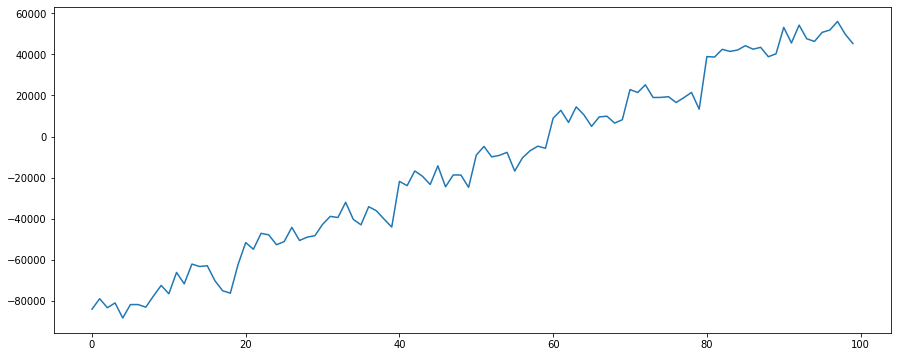

In [10]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
y,fitted_lambda= boxcox(ts + 100000, lmbda=None) # ts + 100000 to make input positive
bxcx = inv_boxcox(y,fitted_lambda)
bxcx -= 100000
plt.plot(bxcx)
plt.show()

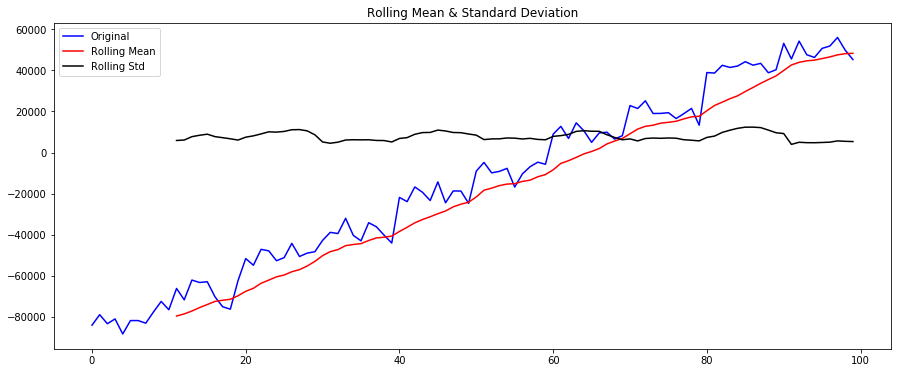

Results of Dickey-Fuller Test:
Test Statistic                 -0.703521
p-value                         0.845835
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [11]:
df_test(pd.Series(bxcx))

**Seasonal Decomposition**

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

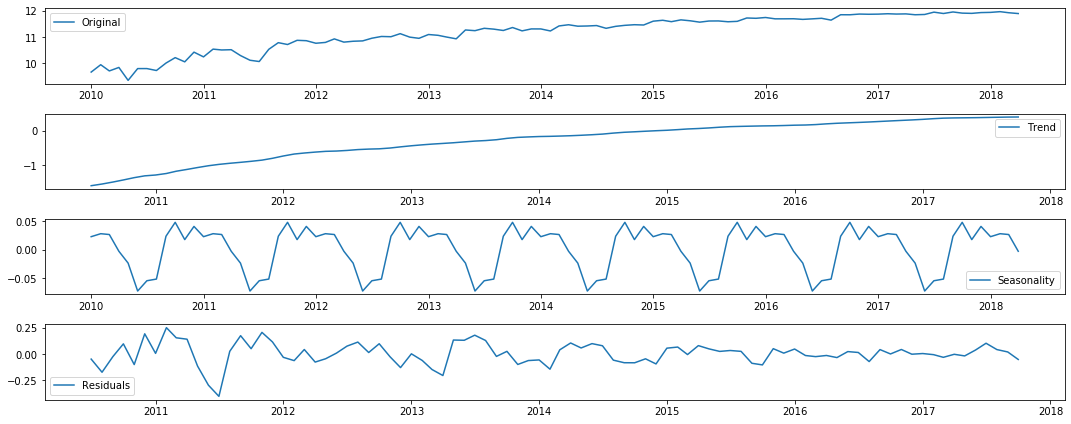

In [39]:
ts_log = np.log(ts + 100000)
#ts_log.dropna(inplace=True)
#print(len(ts_log))
decomposition = seasonal_decompose(ts_log - np.log(100000)) #approx scaling down
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
#print(len(residual.dropna()))
#decomposition.plot()
plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

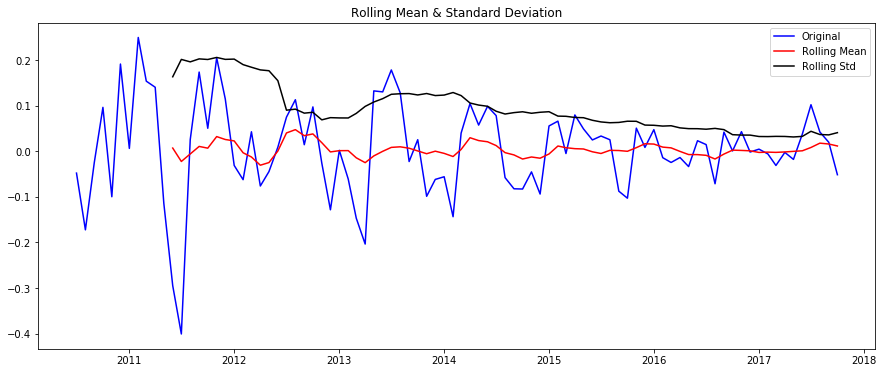

Results of Dickey-Fuller Test:
Test Statistic                -7.211720e+00
p-value                        2.225909e-10
#Lags Used                     7.000000e+00
Number of Observations Used    8.000000e+01
Critical Value (1%)           -3.514869e+00
Critical Value (5%)           -2.898409e+00
Critical Value (10%)          -2.586439e+00
dtype: float64


In [40]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)
df_test(ts_log_decompose)

BoxCox didn't work that's why used residuals to convert to a stationary time series